<h1><center>Machine Learning Project - AVAZU<center></h1>


In [1]:
import sys
from zipfile import ZipFile
import os.path as op
try:
    from urllib.request import urlretrieve
except ImportError:  # Python 2 compat
    from urllib import urlretrieve

AVAZU_URL = "https://bianchi.wp.imt.fr/files/2019/05/train-1000000.zip"
AVAZU_FILENAME = AVAZU_URL.rsplit('/', 1)[1]


if not op.exists(AVAZU_FILENAME):
    print('Downloading %s to %s...' % (AVAZU_URL, AVAZU_FILENAME))
    urlretrieve(AVAZU_URL, AVAZU_FILENAME)
    ZipFile(AVAZU_FILENAME).extractall('.')

In [2]:
ZipFile(AVAZU_FILENAME).extractall('.')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

Data description here: https://www.kaggle.com/c/avazu-ctr-prediction/data  


In [4]:
df = pd.read_csv('train-1000000')

In [5]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3.983206e+18,0,14102915,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,2,4687,320,50,423,2,39,100148,32
1,7.756884e+18,0,14103007,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,0,17894,320,50,2039,2,39,100077,32
2,6.941774e+17,0,14102711,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,1,0,22684,320,50,2619,1,163,100055,71
3,2.664154e+18,1,14102903,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,0,23222,320,50,2676,0,35,100176,221
4,1.480510e+19,0,14102902,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,1,0,8330,320,50,761,3,175,100081,23


In [6]:
import datetime
def datesplit(originalDate):
    originalDate = str(originalDate)

    year = int("20" + originalDate[0:2])
    month = int(originalDate[2:4])
    day = int(originalDate[4:6])
    hour = int(originalDate[6:8])

    return datetime.datetime(year, month, day, hour)

# Exemple :
datesplit(14102915).weekday(), datesplit(14102915).hour

(2, 15)

## **EDA**

### Basic Structure of the DataFrame:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1000000 non-null  float64
 1   click             1000000 non-null  int64  
 2   hour              1000000 non-null  int64  
 3   C1                1000000 non-null  int64  
 4   banner_pos        1000000 non-null  int64  
 5   site_id           1000000 non-null  object 
 6   site_domain       1000000 non-null  object 
 7   site_category     1000000 non-null  object 
 8   app_id            1000000 non-null  object 
 9   app_domain        1000000 non-null  object 
 10  app_category      1000000 non-null  object 
 11  device_id         1000000 non-null  object 
 12  device_ip         1000000 non-null  object 
 13  device_model      1000000 non-null  object 
 14  device_type       1000000 non-null  int64  
 15  device_conn_type  1000000 non-null  int64  
 16  C

No data is missing. C1-C14 are anonymous features

### Transform hour column

In [8]:
df['hour_raw'] = df['hour']
df['weekday'] = pd.DataFrame(df["hour"].apply(lambda x:datesplit(x).weekday()))
df["hour"] = df['hour'].apply(lambda x: datesplit(x).hour)


In [9]:
df[["hour","weekday"]].head()

,hour,weekday
0,15,2
1,7,3
2,11,0
3,3,2
4,2,2


We created a new column with weekday (0 is monday, and 6 is sunday), and moved old format to hour_raw, changing the "hour" to 24-hour time.

In [10]:
df.drop("hour_raw", axis=1, inplace=True)

dropping old column

### Summary statistics:

In [11]:
df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,9.226511e+18,0.169971,11.267452,1004.968549,0.288466,1.015506,0.332436,18835.759473,318.888112,60.030918,2111.794488,1.432802,226.940103,53163.356361,83.404070,2.601855
std,5.322835e+18,0.375608,5.953450,1.096112,0.505974,0.527867,0.856103,4966.228494,21.279475,47.174174,610.393836,1.325815,350.944666,49960.216178,70.326773,1.728335
min,1.003272e+13,0.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,0.000000
25%,4.613978e+18,0.000000,6.000000,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,1.000000
50%,9.238351e+18,0.000000,11.000000,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000,2.000000
75%,1.384023e+19,0.000000,16.000000,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100088.000000,101.000000,4.000000
max,1.844670e+19,1.000000,23.000000,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,6.000000


Our target variable is "click". We see that 17% of ads were clicked.

In [12]:
#we can drop id, because it doesn't provide any info
df.drop("id", axis=1, inplace=True)

### Distribution of Target Variable 'click':

click
0    0.830029
1    0.169971
Name: proportion, dtype: float64


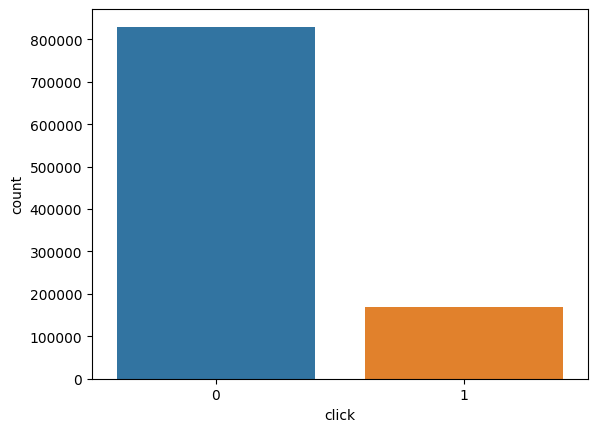

In [13]:
click_counts = df['click'].value_counts(normalize=True)
print(click_counts)
sns.countplot(x='click', data=df)
plt.show()

### Clicks Over Time:

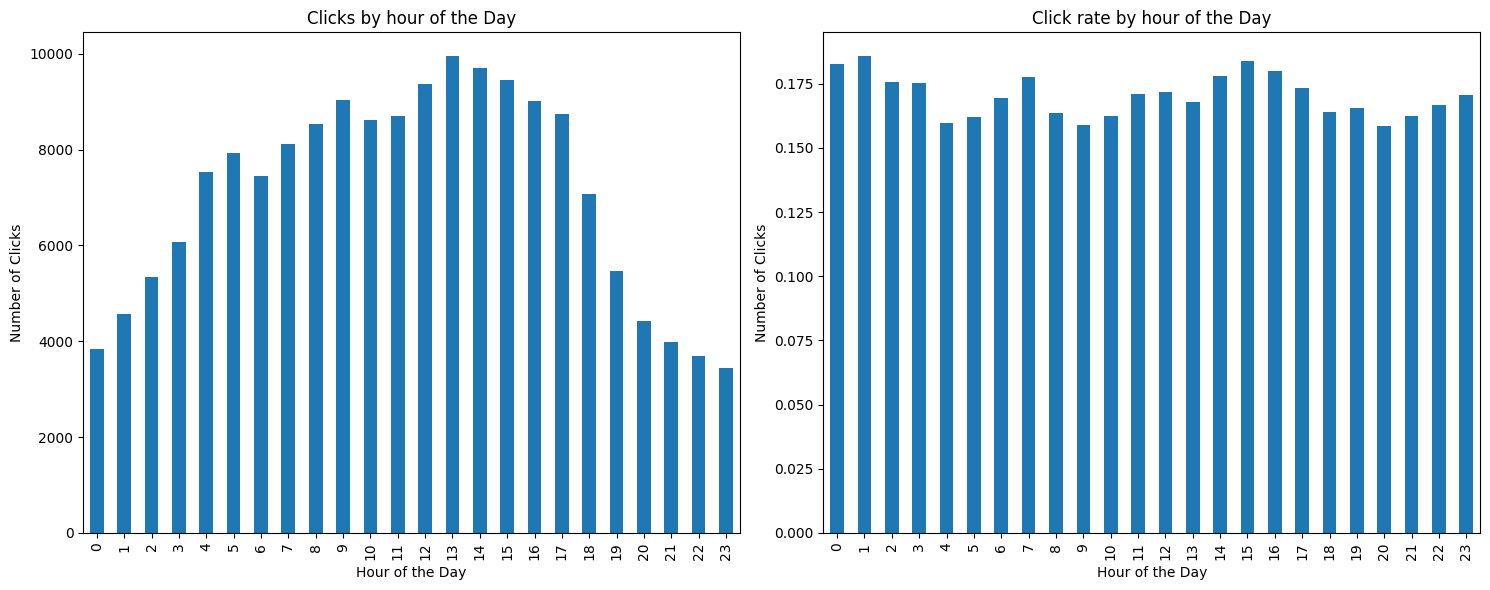

In [14]:
clicks_by_hour = df.groupby('hour')['click'].sum()
plt.figure(figsize=(30, 12))  # Set the figure size for both plots
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
#plot the number of clicks by the hour of the day
clicks_by_hour.plot(kind = "bar", figsize=(15, 6))
plt.title('Clicks by hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Clicks')

click_rate_by_hour = df.groupby('hour')['click'].mean()
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot

#plot the rate of clicks by the hour of the day
click_rate_by_hour.plot(kind = "bar", figsize=(15, 6))
plt.title('Click rate by hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Clicks')

plt.tight_layout()
plt.show()

We see that during midday, there are much more clicks, because there are more impressions (when ad is shown to user).
However, click rate peaks around 1 am, 2-4 pm.

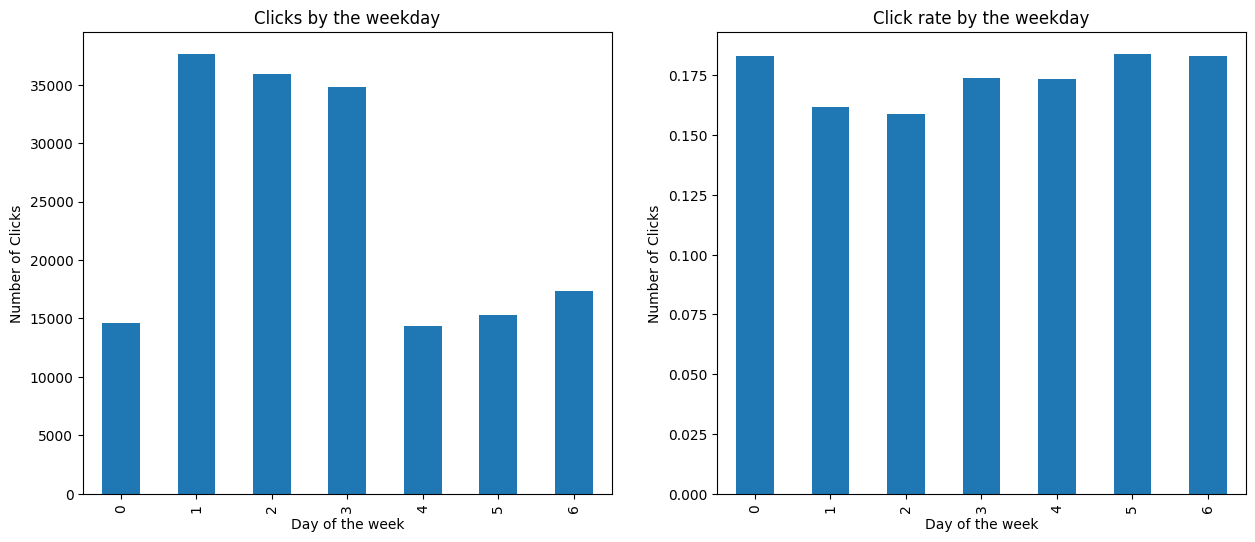

<Figure size 640x480 with 0 Axes>

In [15]:
clicks_by_weekday = df.groupby('weekday')['click'].sum()
plt.figure(figsize=(30, 12))  # Set the figure size for both plots
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
#plot the number of clicks by the weekday
clicks_by_weekday.plot(kind='bar', figsize=(15, 6))
plt.title('Clicks by the weekday')
plt.xlabel('Day of the week')
plt.ylabel('Number of Clicks')

click_rate_by_weekday = df.groupby('weekday')['click'].mean()
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot

#plot the rate of clicks by the weekday
click_rate_by_weekday.plot(kind='bar', figsize=(15, 6))
plt.title('Click rate by the weekday')
plt.xlabel('Day of the week')
plt.ylabel('Number of Clicks')
plt.show()

plt.tight_layout()
plt.show()



Noticably, more ads are shown on Tuesday-Thursday. However, the cleak rate is the very low on those days. biggest click rate is on saturday-monday.

### Click Rate by Device Type:

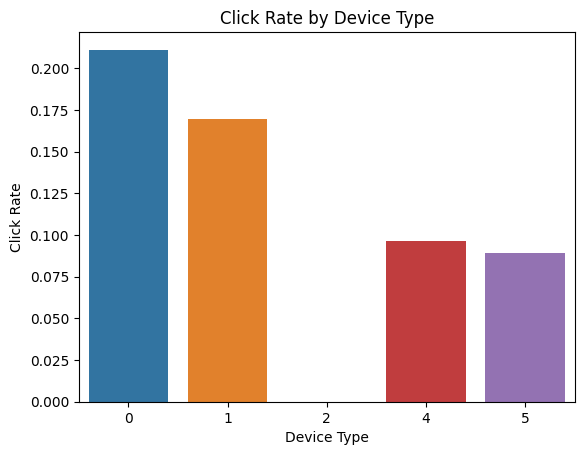

In [16]:
click_rate = df.groupby('device_type')['click'].mean()
sns.barplot(x=click_rate.index, y=click_rate.values)
plt.title('Click Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Click Rate')
plt.show()

We see that device type 0 has around 20% click type, which is much more than the average of 17%.

### Number of unique values

In [17]:
df.nunique().sort_values()

click                    2
C18                      4
device_conn_type         4
device_type              5
weekday                  7
C1                       7
banner_pos               7
C15                      8
C16                      9
site_category           22
hour                    24
app_category            26
C21                     60
C19                     66
C20                    163
app_domain             198
C17                    420
C14                   2243
site_id               2651
site_domain           2871
app_id                3157
device_model          5168
device_id           150501
device_ip           555248
dtype: int64

Some categorical columns have a lot of unique values, such us site_id, site_domain, app_id, app_domain, device_id, device_ip, device_model, and some anonymous C features.

For some of those columns, we will later try to engineer new features, to also include them in the model. Feature engineering is harder for anonymous C features, because we don't know what are they.

### Categorical Features Relation: (uncomment later)

In [18]:
# categorical_features = ['banner_pos', 'site_category', 'device_conn_type', 'C1', 'C18']
# for feature in categorical_features:
#     plt.figure(figsize=(6, 5))
#     sns.barplot(x=feature, y='click', data=df, errorbar=None)
#     plt.xticks(rotation=45)
#     plt.title(f'Click Rate by {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Click Rate')
#     plt.tight_layout()
#     plt.show()

We see that those categorical variables provide good insight. For example, site_category 8fd0aea4 has much bigger click rate (over 50%), than other categories.

### Top 10 site_id's

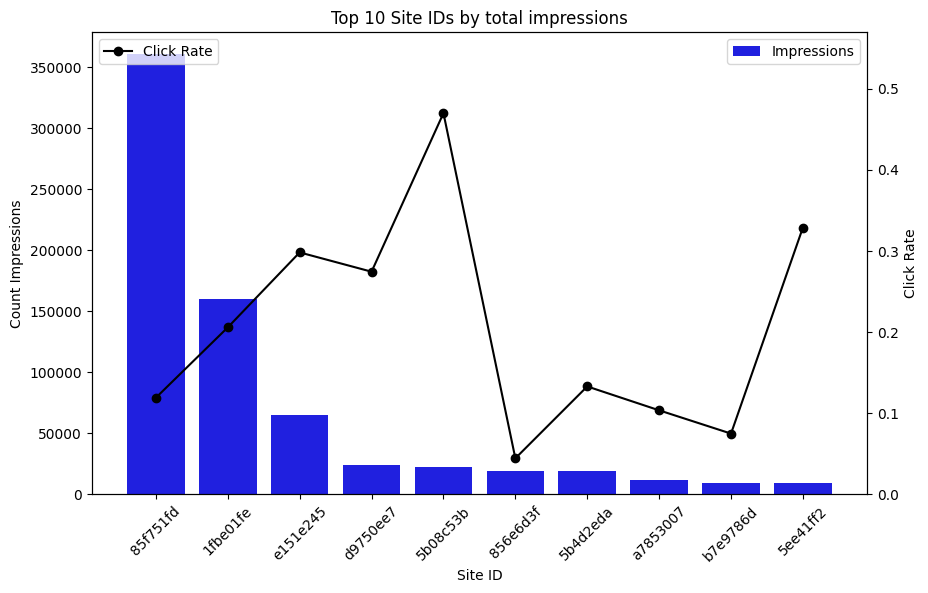

In [19]:
# First, calculate the click rates for each site_id
site_clicks = df.groupby('site_id')['click'].agg(['mean', 'size'])
site_clicks.columns = ['click_rate', 'total']

# Sort by click rate and take the top 10 by total ads shown
top_sites = site_clicks.sort_values(by='total', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))

sns.barplot(x=top_sites.index, y='total', data=top_sites, color='blue', label='Impressions')

plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Site ID')
plt.ylabel('Count Impressions')
plt.title('Top 10 Site IDs by total impressions')

# Right axis: Click Rate
ax2 = plt.gca().twinx()
ax2.plot(top_sites.index, top_sites['click_rate'], color='black', marker='o', label='Click Rate')
ax2.set_ylabel('Click Rate')
ax2.set_ylim(0, top_sites['click_rate'].max() + 0.1)  # Adjust the limit accordingly

plt.legend(loc='upper left')
plt.show()

Those are top-10 most popular site_id's in the dataset. We see that for example, first website showed a lot of ads, but the click rate is very low for that site. Maybe it's because that website has a lot of ads, which creates a lot of visual noise for users.

Also, interesting site is 5b08c53b (top 5th). It has enormous click rate with almost 50%. Maybe we can utilize this feature for model.

### Top 10 site domains

Repeat the same thing as with site id's

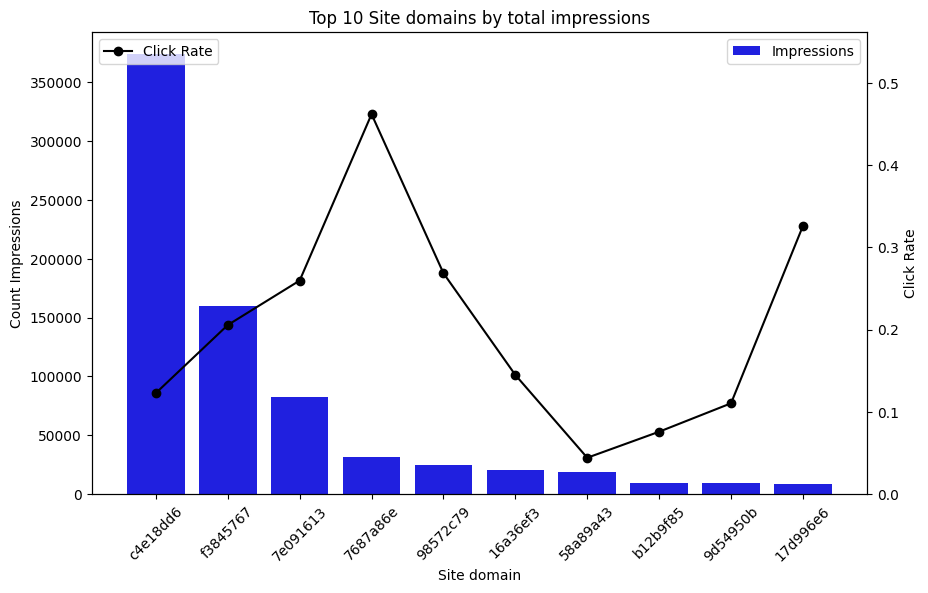

In [20]:
# First, calculate the click rates for each site_domain
site_clicks = df.groupby('site_domain')['click'].agg(['mean', 'size'])
site_clicks.columns = ['click_rate', 'total']

# Sort by click rate and take the top 10 domains
top_domains = site_clicks.sort_values(by='total', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))

sns.barplot(x=top_domains.index, y='total', data=top_domains, color='blue', label='Impressions')

plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Site domain')
plt.ylabel('Count Impressions')
plt.title('Top 10 Site domains by total impressions')

# Right axis: Click Rate
ax2 = plt.gca().twinx()
ax2.plot(top_domains.index, top_domains['click_rate'], color='black', marker='o', label='Click Rate')
ax2.set_ylabel('Click Rate')
ax2.set_ylim(0, top_domains['click_rate'].max() + 0.1)  # Adjust the limit accordingly

plt.legend(loc='upper left')
plt.show()

We see similar thing, top 4 domain has more click rate, even though it has less impressions

## Feature engineering

### Features correlation

In [21]:
numerical_features = ["hour", "C1", "banner_pos","device_type","device_conn_type", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C21"]

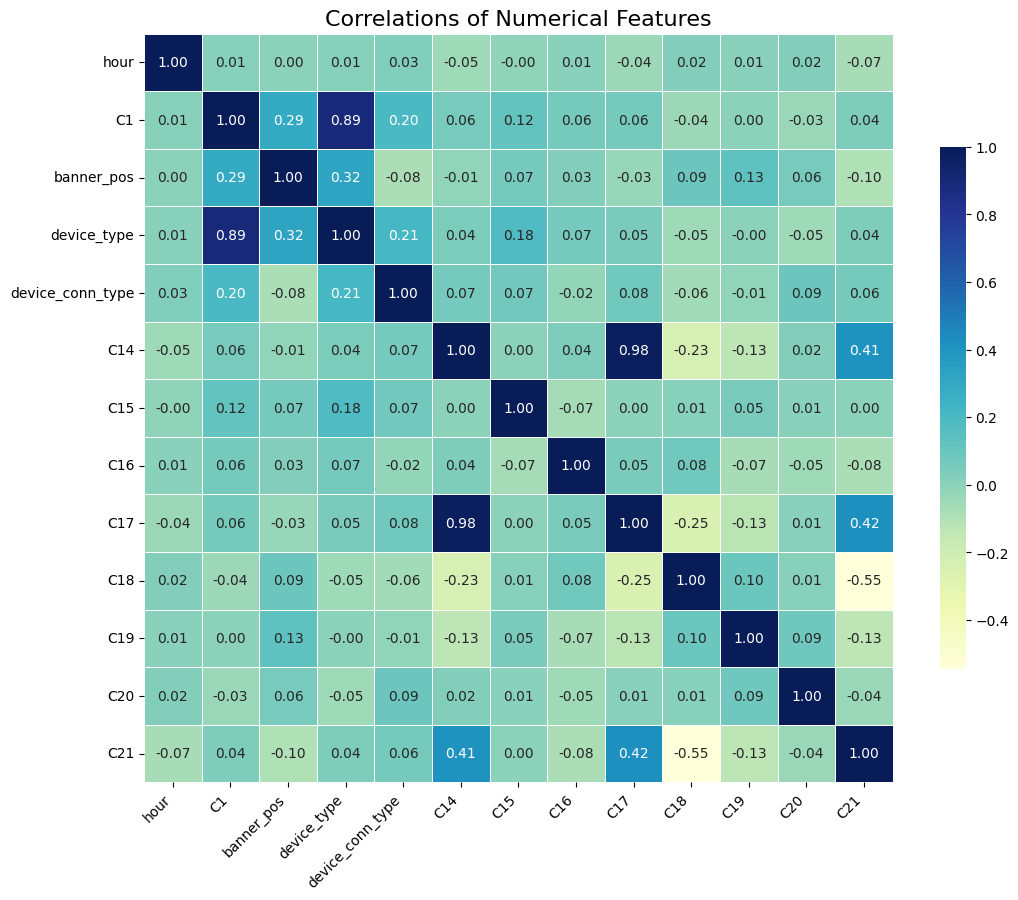

In [22]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a figure and a set of subplots
figure, axis = plt.subplots(figsize=(11, 11))  # Ensure the figure is large enough to display all data clearly

# Generate a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, ax=axis, annot=True, cmap="YlGnBu", fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title
plt.title("Correlations of Numerical Features", fontsize=16)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x labels for better readability
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()


We see that there is very strong correlation between C17 and C14 (almost 1). Also, device_type and C1 are very correlated (0.89). Thus it's better to drop one of columns.

In [23]:
#i decided to remove "C17" and "C1"
df.drop(["C17", "C1"], axis=1, inplace=True)

In [24]:
numerical_features.remove("C17")
numerical_features.remove("C1")

### Hashing categorical features

In [25]:
#hashing categorical features, so that we can input them to the models
categorical_features = ["site_id", "site_domain", "site_category", "app_id", "app_domain", "app_category", "device_id", "device_ip", "device_model"]

for feature in categorical_features:
  df[feature] = df[feature].apply(lambda x: hash(x))

df.head(5)

,click,hour,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_type,device_conn_type,C14,C15,C16,C18,C19,C20,C21,weekday
0,0,15,1,-1978623668718719647,4161724062318593055,-3918342978981586822,-977353341154758205,-760244206315839037,-4505715016276299113,-3510068932001340644,...,1,2,4687,320,50,2,39,100148,32,2
1,0,7,0,-3354628463473986417,5130016627843253494,7207202204714055306,-977353341154758205,-760244206315839037,-4505715016276299113,8736768247582912638,...,0,0,17894,320,50,2,39,100077,32,3
2,0,11,0,-2512365259258710474,2585294871788446203,7207202204714055306,4265658008650722046,-3333169636083383472,819609625264995916,-3510068932001340644,...,1,0,22684,320,50,1,163,100055,71,0
3,1,3,0,-2512365259258710474,2585294871788446203,7207202204714055306,3641324758929368454,5222601036026314064,-5845120942770942420,-3510068932001340644,...,1,0,23222,320,50,0,35,100176,221,2
4,0,2,1,-870627557689022272,7205073203403468442,-3918342978981586822,-977353341154758205,-760244206315839037,-4505715016276299113,-3510068932001340644,...,1,0,8330,320,50,3,175,100081,23,2


### Choose features

In [26]:
#choose features for training
features = numerical_features + categorical_features
features

['hour',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C18',
 'C19',
 'C20',
 'C21',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model']

### Split for train and test

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df["click"], test_size=0.3, random_state=42)

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [29]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 30],  # Regularization strength
}

# Initialize the LogisticRegression and GridSearchCV
log_reg = LogisticRegression(solver = "liblinear", random_state=42)
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='neg_log_loss', verbose=2, n_jobs=1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_estimator = grid_search.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................................C=0.001; total time=   1.3s
[CV] END ............................................C=0.001; total time=   1.2s
[CV] END ............................................C=0.001; total time=   1.3s
[CV] END ............................................C=0.001; total time=   1.3s
[CV] END ............................................C=0.001; total time=   1.3s
[CV] END .............................................C=0.01; total time=   1.2s
[CV] END .............................................C=0.01; total time=   1.1s
[CV] END .............................................C=0.01; total time=   1.1s
[CV] END .............................................C=0.01; total time=   1.2s
[CV] END .............................................C=0.01; total time=   1.1s
[CV] END ..............................................C=0.1; total time=   1.2s
[CV] END ........................................

In [30]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.001}


In [31]:
def print_conf_mat(conf_mat):
    # Calculate the percentage-based confusion matrix
    conf_mat_percent = conf_mat / np.sum(conf_mat)

    # Set up the figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharey=True)

    # Plot the raw counts confusion matrix
    sns.heatmap(conf_mat, ax=axes[0], annot=True, cmap="YlGnBu", fmt=".0f", square=True, linewidths=.5, cbar_kws={"shrink": .5})
    axes[0].set_title("Confusion Matrix - Counts", fontsize=16)
    axes[0].set_xlabel("Predicted Labels", fontsize=12)
    axes[0].set_ylabel("Actual Labels", fontsize=12)
    axes[0].set_xticklabels(['Predicted 0', 'Predicted 1'], rotation=45, fontsize=10)
    axes[0].set_yticklabels(['Actual 0', 'Actual 1'], rotation=0, fontsize=10)

    # Plot the percentage confusion matrix
    sns.heatmap(conf_mat_percent, ax=axes[1], annot=True, cmap="YlGnBu", fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5})
    axes[1].set_title("Confusion Matrix - Percentages", fontsize=16)
    axes[1].set_xlabel("Predicted Labels", fontsize=12)
    axes[1].set_xticklabels(['Predicted 0', 'Predicted 1'], rotation=45, fontsize=10)

    plt.tight_layout()
    plt.show()

def print_roc_curve(y_test, soft_proba):
  fpr, tpr, thresholds = roc_curve(y_test, soft_proba)

  # Plotting the ROC curve
  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.grid(True)
  plt.show()

def print_evaluations(y_test, soft_proba):
  roc_auc = roc_auc_score(y_test, soft_proba)
  loss = log_loss(y_test, soft_proba)
  conf_mat = confusion_matrix(y_test, soft_proba > 0.5)
  accuracy = accuracy_score(y_test, soft_proba > 0.5)
  class_report = classification_report(y_test, soft_proba > 0.5)

  # Print the results
  print_conf_mat(conf_mat)
  print_roc_curve(y_test, soft_proba)
  print(f"ROC-AUC: {roc_auc}")
  print(f"Log_loss: {loss}")
  print("Accuracy Score:", accuracy)
  print("Classification Report:\n", class_report)

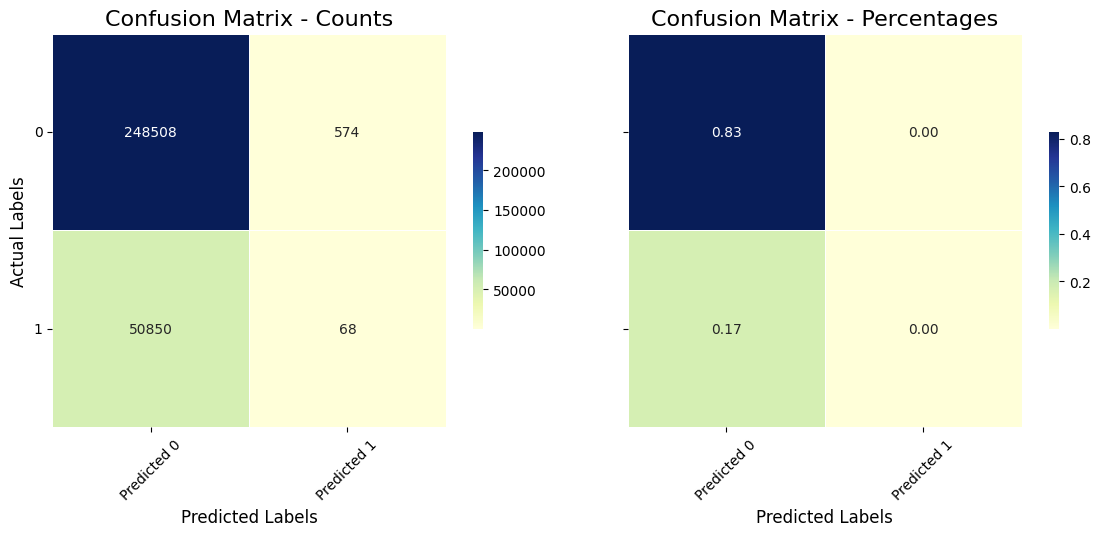

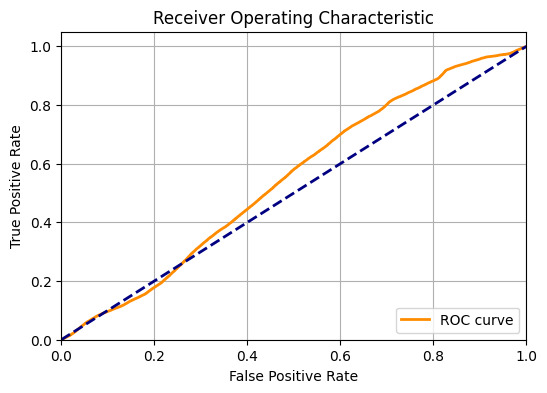

ROC-AUC: 0.5461576648326925
Log_loss: 0.4644391425104998
Accuracy Score: 0.8285866666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91    249082
           1       0.11      0.00      0.00     50918

    accuracy                           0.83    300000
   macro avg       0.47      0.50      0.45    300000
weighted avg       0.71      0.83      0.75    300000



In [32]:
# Predict on the test set
y_pred = best_estimator.predict(X_test)
y_soft = best_estimator.predict_proba(X_test)[:, 1]
print_evaluations(y_test, y_soft)


Comments: \
**ROC-AUC**: The AUC score is 0.552, which is only slightly better than a random guess (0.5). A value closer to 1 would indicate a better performing model. \
**Accuracy Score** is also low. Simply always guessing 0, we would get around 83%. \
Lower **log loss** indicates a better model. Here we achieved 0.47, but it surely can be better. \
for class 0:


*   **Precision**: 0.84 indicates that when the model predicts class 0, it is
correct 84% of the time.
*   **Recall:** 0.94 indicates that the model is capturing 94% of the actual class 0 instances.
*   **F1-Score:** 0.89 is the harmonic mean of precision and recall, indicating a high performance for class 0.


for class 1:

* **Precision**: 0.29 is quite low, meaning the model's predictions for class 1 are often incorrect.
* **Recall**: 0.11 is also low, indicating that the model is missing a lot of actual class 1 instances.
* **F1-Score**: 0.16 is low, reflecting poor performance in predicting class 1.

This is expected, because class 1 is very imbalanced.

### Trying balanced classes weight

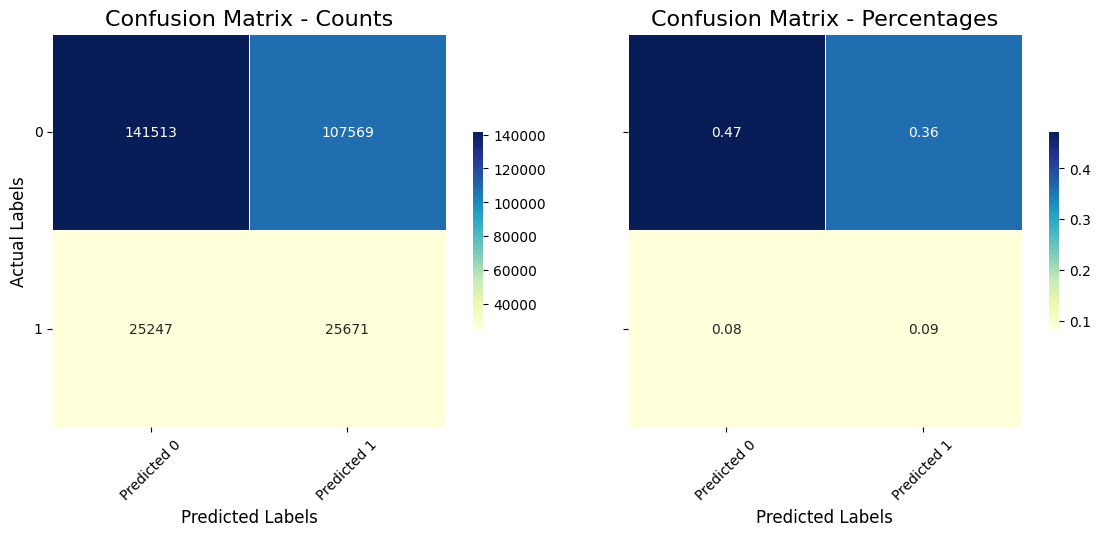

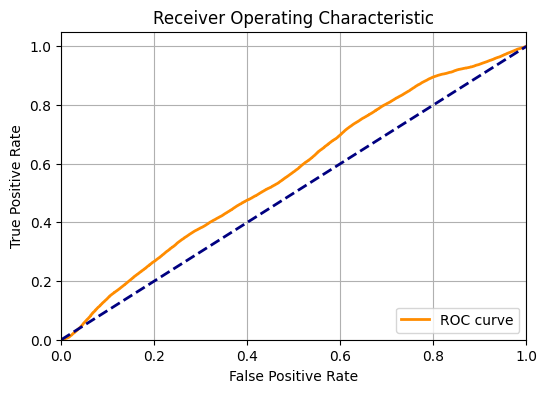

ROC-AUC: 0.5675230024405302
Log_loss: 0.67258747310423
Accuracy Score: 0.55728
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.57      0.68    249082
           1       0.19      0.50      0.28     50918

    accuracy                           0.56    300000
   macro avg       0.52      0.54      0.48    300000
weighted avg       0.74      0.56      0.61    300000



In [33]:
log_reg_balanced = LogisticRegression(solver = "liblinear", class_weight = "balanced", C = 10, random_state=42)
log_reg_balanced.fit(X_train, y_train)

y_soft_balanced = log_reg_balanced.predict_proba(X_test)[:, 1]
print_evaluations(y_test, y_soft_balanced)

This improved the AUC score, and balanced more recall between classes, but accuracy score of 56% is terrible.

This indicates that model improved the classifying of 1 in expense of the risk of misclassifying the majority class.

Let's move on to the next model trying to improve both the AUC and accuracy score.

## XGboost

### model training

Let's try to apply XGboost


In [34]:
from xgboost import XGBClassifier

# Let's define a parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=1, verbose=2, scoring='roc_auc')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best average ROC-AUC found: {grid_search.best_score_}")

# Choosing best estimator
best_estimator_xgb = grid_search.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

### model evaluation

In [35]:
probs_xgb = best_estimator_xgb.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

In [36]:
y_pred_xgb = best_estimator_xgb.predict(X_test)

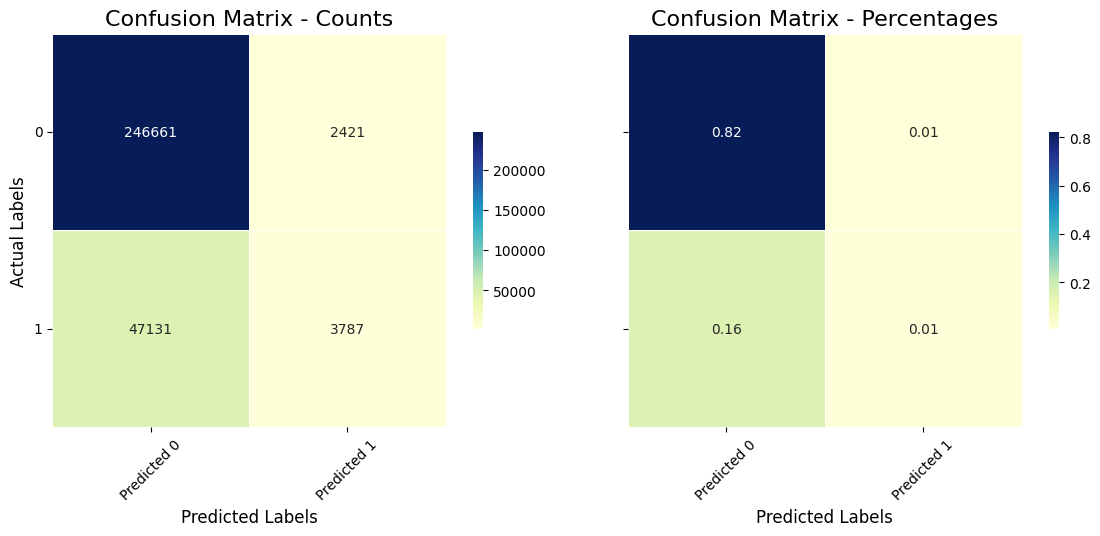

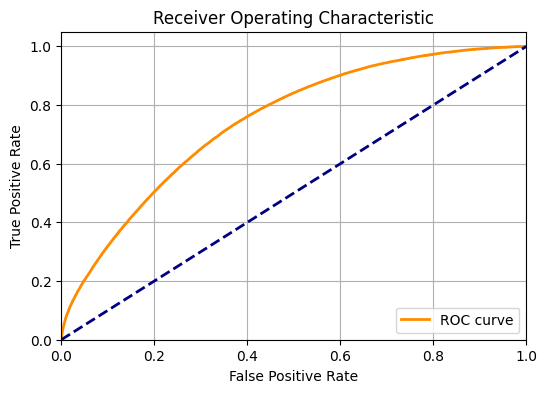

ROC-AUC: 0.743777567702148
Log_loss: 0.39901784699306214
Accuracy Score: 0.8348266666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91    249082
           1       0.61      0.07      0.13     50918

    accuracy                           0.83    300000
   macro avg       0.72      0.53      0.52    300000
weighted avg       0.80      0.83      0.78    300000



In [37]:
# Evaluate the model
print_evaluations(y_test, probs_xgb)

This model shows good ability to predict 0 with high precision and recall, which leads to accuracy of approximately 83.5%. However, as was discussed earlier, it is still only slightly better than always guessing 0 (it would gain us 83%).

The model struggles with identifying the class 1, as reflected by a lower recall and F1-score for class 1. Recall is only 7%. The true positives are only 1%. Model just didn't risk it to even try to guess 1's, so that's how it obtained this accuracy score. Overall, the model's performance is skewed towards the majority class, which could be expected in such imbalanced dataset.

## MLP

### Model training

In [47]:
from sklearn.neural_network import MLPClassifier

# Sample 10% of data for the grid search, so that it runs faster
X_small, _, y_small, _ = train_test_split(X_train, y_train, stratify=y_train, test_size=0.9, random_state=42)

# Define the MLP classifier and the parameter grid
mlp = MLPClassifier(max_iter=1000)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.01, 0.1],
    'learning_rate_init': [0.001],
}

# Perform grid search on the smaller dataset
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=3, n_jobs=1, verbose=2, scoring="roc_auc")
grid_search.fit(X_small, y_small)

print("Best parameters found:", grid_search.best_params_)

# Use the best parameters to fit the MLP classifier on the entire training set
best_params = grid_search.best_params_
mlp_best = MLPClassifier(**best_params, max_iter=1000)
mlp_best.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   7.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   5.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   5.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam; total time=  15.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam; total time=   4.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam; total time=  12.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam; total time=  20.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam; total time=  25.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam; total time=  15.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   5.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   6.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   5.0s
[CV] END 

MLPClassifier(alpha=0.01, max_iter=1000)

### Model Evaluation

In [48]:
soft_pred = mlp_best.predict_proba(X_test)[:, 1]

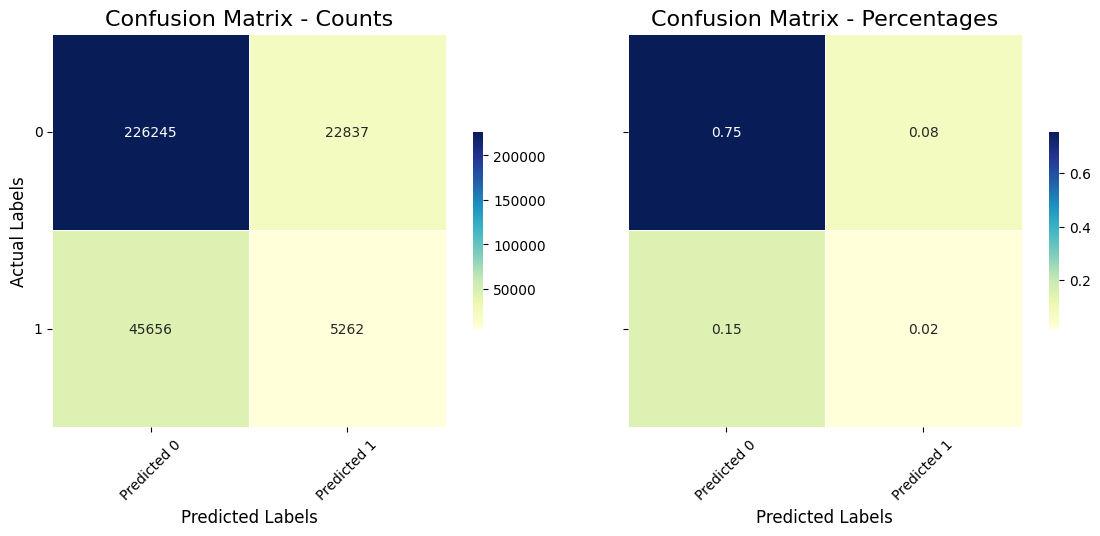

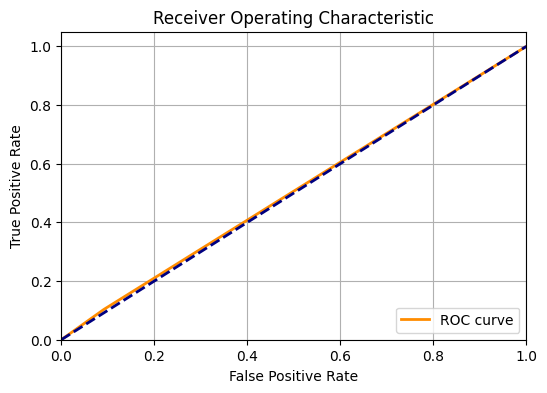

ROC-AUC: 0.5058289816158428
Log_loss: 8.229126505269337
Accuracy Score: 0.77169
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87    249082
           1       0.19      0.10      0.13     50918

    accuracy                           0.77    300000
   macro avg       0.51      0.51      0.50    300000
weighted avg       0.72      0.77      0.74    300000



In [49]:
print_evaluations(y_test, soft_pred)

Performance of MLP is much more worse, than XGboost, maybe it would be possible to achieve better results with better feature engineering, or fine-tuning of the model, but grid search is taking really a lot of time for MLP.

The XGBoost model demonstrated better overall performance, specifically with a higher AUC, accuracy, lower log loss.

However, the MLP model, despite lower overall metrics, shows a greater propensity to correctly identifying click (1), as shown by slightly better recall metric.

So, I favour XGboost.

## Kaggle Submission

In [ ]:
test_df = pd.read_csv('test.csv', dtype={'id': str})

answers = pd.DataFrame()
answers['id'] = test_df['id']

# preprocressing


answers['click'] = best_estimator_xgb.predict_proba(test_df[features])[:, 1]
answers.to_csv('submission.csv', index=False)

![image.png](attachment:image.png)

## Conclusion

In this project, we compared the performance of three different models: Logistic Regression, Multi-Layer Perceptron (MLP), and XGBoost on an imbalanced classification task.

**Logistic Regression:**

* Showed improved sensitivity towards the minority class when class weights were balanced, as showcased by a better AUC score.
* However, this sensitivity came at the expense of overall accuracy.

**MLP**:

* Demonstrated a willingness to predict more positive instances, resulting in a higher number of both true positives and false positives.
* This led to a better recall for the positive class but also a considerable number of misclassifications, reflected in a lower overall accuracy and AUC score.
* However the overall performance of it is really poor, and probably there should be done better hyperparameter tuning.

**XGBoost:**

* Exhibited good performance on the 0 class with high precision and recall, obtaining a high accuracy score.
* Despite a reasonable AUC score, it struggled with classifying the positive class, being very insensitive to it. There is still much room for improvement in identifying the minority class of click.

**Suggestions for Improvement:**

* better feature engineering

* better hyperparameter tuning (especially applies to MLP)

* consider other models

* Resampling. It may halp to apply oversampling techniques like SMOTE or undersampling techniques to balance the class distribution.

In conclusion, we achieved 0.5% better accuracy with XGboost than just plainly guessing 0.